In [1]:
%config InlineBackend.figure_formats = ['svg']
from pathlib import Path
from ast import literal_eval

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import utils

In [2]:
timeseries_l, timeseries_r = utils.load_lr_heel_data()
song_names = utils.load_song_names()
song_genres = utils.load_song_genres()
participant_numbers = utils.load_participant_numbers()

In [3]:
up_threshold_mm = 20

percents_l = pd.DataFrame(columns=song_names, index=participant_numbers, dtype=float)
percents_r = percents_l.copy(deep=True)

In [4]:
for participant_number, row in timeseries_l.iterrows():
    for song_name in list(timeseries_l.columns):
        normalized = np.array(row[song_name][0])

        #calculate the percent of time the heel is 'up', that is, above some threshold
        percent = (normalized > up_threshold_mm).sum() / len(normalized) * 100

        # store data
        percents_l.loc[participant_number, song_name] = percent
percents_l = percents_l[::-1]
percents_l

,Bloodline,GoIntoTheWater,BackInBlack,TheOcean,Juju,SoWhat
9,70.920000,76.783505,0.000000,0.000000,87.771308,5.785714
8,36.840000,32.769759,0.000000,0.000000,26.641080,30.035714
7,46.626667,71.120275,0.000000,0.000000,75.741133,0.357143
6,91.426667,57.512027,0.000000,0.380952,0.000000,0.000000
5,47.266667,27.257732,0.000000,0.000000,14.385918,41.845238
4,55.533333,35.697595,3.829457,18.190476,50.608788,64.023810
3,0.000000,0.000000,64.976744,68.968254,83.536263,26.880952
2,86.040000,94.749141,36.325581,26.142857,91.503441,61.404762
1,61.733333,53.168385,4.666667,21.761905,55.505558,55.142857


In [5]:
for participant_number, row in timeseries_r.iterrows():
    for song_name in list(timeseries_r.columns):
        normalized = np.array(row[song_name][0])

        #calculate the percent of time the heel is 'up', that is, above some threshold
        percent = (normalized > up_threshold_mm).sum() / len(normalized) * 100

        # store data
        percents_r.loc[participant_number, song_name] = percent
percents_r = percents_r[::-1]
percents_r

,Bloodline,GoIntoTheWater,BackInBlack,TheOcean,Juju,SoWhat
9,55.973333,57.938144,65.736434,67.365079,2.871890,0.000000
8,50.640000,32.316151,15.829457,33.904762,2.104288,0.000000
7,62.040000,83.711340,22.620155,74.682540,43.488618,0.000000
6,65.360000,40.962199,14.573643,13.555556,0.158814,1.702381
5,56.706667,31.189003,15.116279,19.333333,0.000000,0.000000
4,66.826667,37.140893,29.565891,31.158730,17.721016,0.000000
3,0.333333,0.000000,14.976744,14.841270,0.000000,0.000000
2,68.360000,0.000000,0.000000,0.000000,0.000000,0.000000
1,58.400000,42.487973,35.054264,46.301587,7.027528,0.000000


## Visualize raw data
i.e., percent of time the heel is 'up' for each participant and song

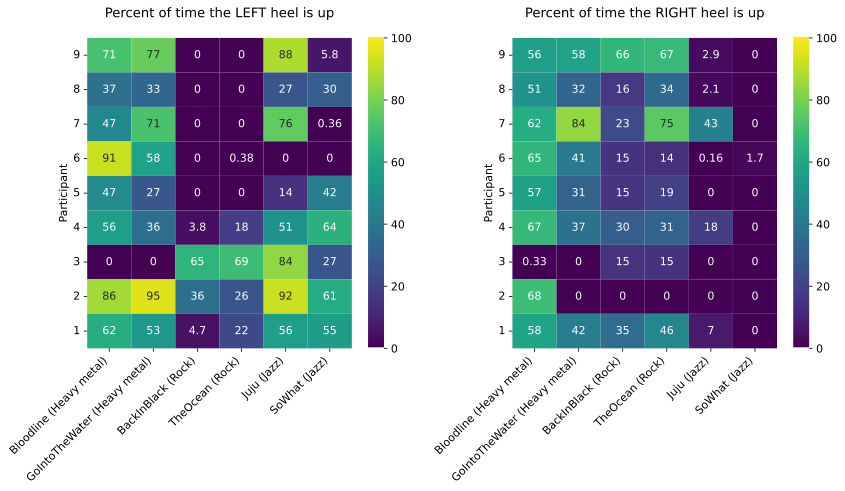

In [6]:
matplotlib.rcParams.update({'font.size':11})
cmap = 'viridis'

# CHECK THAT THESE ARE BEING REPLACED IN THE SAME ORDER!!!
xticklabels = ["%s (%s)"%(song, genre) for song, genre in song_genres.items()]

fig, axs = plt.subplots(1, 2, figsize=(12,7))
l = sns.heatmap(percents_l, annot=True, ax=axs[0], vmax=100, cmap=cmap)
axs[0].set(
#     xlabel='Song', 
    ylabel='Participant',
    xticklabels=xticklabels,
    title='Percent of time the LEFT heel is up\n')
l.set_xticklabels(l.get_xticklabels(), rotation=45, horizontalalignment='right')
l.set_yticklabels(l.get_yticklabels(), rotation=0, horizontalalignment='right')

r = sns.heatmap(percents_r, annot=True, ax=axs[1], vmax=100, cmap=cmap)
axs[1].set(
#     xlabel='Song', 
    ylabel='Participant',
    xticklabels=xticklabels,
    title='Percent of time the RIGHT heel is up\n')
r.set_xticklabels(r.get_xticklabels(), rotation=45, horizontalalignment='right')
r.set_yticklabels(r.get_yticklabels(), rotation=0, horizontalalignment='right')


plt.tight_layout()
plt.savefig(utils.get_figures_folder() / "fig3_heel-up-raw-data.png")

## Put data in long form

In [7]:
csv_path = Path().resolve().parent / "data" / "heel.csv"
df = pd.read_csv(csv_path)
df

,lh_up,rh_up,song,genre,drummer
0,71.00,56.00,1,metal,a
1,77.00,58.00,2,metal,a
2,0.00,66.00,3,rock,a
3,0.00,67.00,4,rock,a
4,88.00,2.90,5,jazz,a
5,5.80,0.00,6,jazz,a
6,37.00,51.00,1,metal,b
7,33.00,32.00,2,metal,b
8,0.00,16.00,3,rock,b
9,0.00,34.00,4,rock,b


In [8]:
cols = ['lh_up', 'rh_up', 'genre', 'drummer']
df = pd.DataFrame(columns=cols, )
i_row = 0
for ptp, row in percents_l.iterrows():
    for song in row.keys():
#         df.loc[i_row, "song"] = song
        df.loc[i_row, "genre"] = song_genres[song]
        df.loc[i_row, "drummer"] = f"ptp_{ptp}"
        df.loc[i_row, "lh_up"] = row[song]
        df.loc[i_row, "rh_up"] = percents_r.loc[ptp, song]
        i_row = i_row + 1
        
df[["lh_up", "rh_up"]] = df[["lh_up", "rh_up"]].astype(float)
df.head(8)

,lh_up,rh_up,genre,drummer
0,70.920000,55.973333,Heavy metal,ptp_9
1,76.783505,57.938144,Heavy metal,ptp_9
2,0.000000,65.736434,Rock,ptp_9
3,0.000000,67.365079,Rock,ptp_9
4,87.771308,2.871890,Jazz,ptp_9
5,5.785714,0.000000,Jazz,ptp_9
6,36.840000,50.640000,Heavy metal,ptp_8
7,32.769759,32.316151,Heavy metal,ptp_8


## Put jazz first

In [9]:
i_genres = {
    'Jazz': 0,
    'Rock': 1,
    'Heavy metal': 2
}

for ind, row in df.iterrows():
    df.loc[ind, 'genre'] = f'{i_genres[row.genre]}{row.genre}'

df.head()

,lh_up,rh_up,genre,drummer
0,70.920000,55.973333,2Heavy metal,ptp_9
1,76.783505,57.938144,2Heavy metal,ptp_9
2,0.000000,65.736434,1Rock,ptp_9
3,0.000000,67.365079,1Rock,ptp_9
4,87.771308,2.871890,0Jazz,ptp_9


In [10]:
md = smf.mixedlm("lh_up ~ genre", df, groups=df["drummer"])
mdf = md.fit(reml=False)
print("--------------%s-------------" % "Left heel")
print(mdf.summary())

--------------Left heel-------------
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     lh_up    
No. Observations:     54          Method:                 ML       
No. Groups:           9           Scale:                  640.0601 
Min. group size:      6           Log-Likelihood:         -253.2204
Max. group size:      6           Converged:              Yes      
Mean group size:      6.0                                          
-------------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept              42.843    6.539  6.552 0.000  30.027  55.659
genre[T.1Rock]        -29.218    8.433 -3.465 0.001 -45.747 -12.690
genre[T.2Heavy metal]   9.682    8.433  1.148 0.251  -6.847  26.211
Group Var              64.788    3.500                             



In [11]:
md = smf.mixedlm("rh_up ~ genre", df, groups=df["drummer"])
mdf = md.fit(reml=False)
print("--------------%s-------------" % "Right heel")
print(mdf.summary())

--------------Right heel-------------
             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    rh_up    
No. Observations:    54         Method:                ML       
No. Groups:          9          Scale:                 260.8592 
Min. group size:     6          Log-Likelihood:        -232.8255
Max. group size:     6          Converged:             Yes      
Mean group size:     6.0                                        
----------------------------------------------------------------
                       Coef.  Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept               4.171    5.281 0.790 0.430 -6.179 14.521
genre[T.1Rock]         24.419    5.384 4.536 0.000 13.867 34.971
genre[T.2Heavy metal]  40.851    5.384 7.588 0.000 30.299 51.403
Group Var             120.557    5.245                          



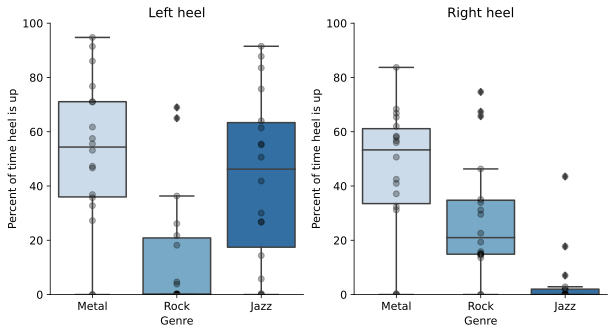

In [12]:
# colors = ["#451953ff", "#1a918bff", "#ffe349ff"]
colors = ['r', 'g', 'b']
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="lh_up", ax=axs[0], palette="Blues")
axs[0].scatter(x=df["genre"], y=df["lh_up"], alpha=0.3, color='k')
axs[0].set_title("Left heel")

sns.boxplot(data=df, x="genre", y="rh_up", ax=axs[1], palette="Blues")
axs[1].scatter(x=df["genre"], y=df["rh_up"], alpha=0.3, color='k')
axs[1].set_title("Right heel")


for n in [0, 1]:
    axs[n].set_ylabel("Percent of time heel is up")
    axs[n].set_ylim([0, 100])
    axs[n].set_xticklabels(["Metal", "Rock", "Jazz"])
    axs[n].set_xlabel("Genre")
    axs[n].spines["top"].set_visible(False)
    axs[n].spines["right"].set_visible(False)

fig.savefig(utils.get_figures_folder() / "heel_up.png")